In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/robertferro/prevendo_preco_de_acoes_na_bolsa_de_valores/main/bolsa_de_valores_2020.csv'

In [3]:
dados=pd.read_csv(url, sep=',')

In [4]:
dados.head()

,data_do_pregao,sigla_acao,nome_acao,preco_abertura,preco_max,preco_min,preco_fechamento,qtde_negocio,volume_negocio
0,2020-01-02,AALR3,ALLIAR,1829.0,1900.0,1828.0,1900.0,585800.0,1.094620e+09
1,2020-01-02,AAPL34,APPLE,12000.0,12134.0,12000.0,12134.0,12700.0,1.533380e+08
2,2020-01-02,ABCB4,ABC BRASIL,2000.0,2030.0,1982.0,2030.0,870400.0,1.745788e+09
3,2020-01-02,ABEV3,AMBEV S/A,1886.0,1925.0,1878.0,1920.0,16011300.0,3.062348e+10
4,2020-01-02,ADHM3,ADVANCED-DH,255.0,255.0,235.0,248.0,193400.0,4.719270e+07


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122226 entries, 0 to 122225
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   data_do_pregao    122226 non-null  object 
 1   sigla_acao        122226 non-null  object 
 2   nome_acao         122226 non-null  object 
 3   preco_abertura    122226 non-null  float64
 4   preco_max         122226 non-null  float64
 5   preco_min         122226 non-null  float64
 6   preco_fechamento  122226 non-null  float64
 7   qtde_negocio      122226 non-null  float64
 8   volume_negocio    122226 non-null  float64
dtypes: float64(6), object(3)
memory usage: 8.4+ MB


 - Convetendo a coluna data_pregao para formato datetime.

In [6]:
dados['data_do_pregao'] = pd.to_datetime(dados['data_do_pregao'], format='%Y-%m-%d')

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122226 entries, 0 to 122225
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   data_do_pregao    122226 non-null  datetime64[ns]
 1   sigla_acao        122226 non-null  object        
 2   nome_acao         122226 non-null  object        
 3   preco_abertura    122226 non-null  float64       
 4   preco_max         122226 non-null  float64       
 5   preco_min         122226 non-null  float64       
 6   preco_fechamento  122226 non-null  float64       
 7   qtde_negocio      122226 non-null  float64       
 8   volume_negocio    122226 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 8.4+ MB


In [8]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
preco_abertura,122226.0,1.376233e+04,1.051776e+05,50.0,1159.0,2826.0,1.078000e+04,1.175770e+07
preco_max,122226.0,1.385747e+04,1.052867e+05,53.0,1189.0,2884.0,1.088800e+04,1.175770e+07
preco_min,122226.0,1.365987e+04,1.050547e+05,48.0,1124.0,2765.0,1.066800e+04,1.175770e+07
preco_fechamento,122226.0,1.376258e+04,1.051751e+05,48.0,1157.0,2824.0,1.078000e+04,1.175770e+07
qtde_negocio,122226.0,2.473601e+06,8.921807e+06,1.0,600.0,16700.0,1.361475e+06,3.085628e+08
volume_negocio,122226.0,5.152674e+09,2.596031e+10,873.0,4388822.5,55131925.0,2.218780e+09,4.298380e+12


- Verificando a existência de dados nulos.

In [9]:
dados.isnull().sum()

data_do_pregao      0
sigla_acao          0
nome_acao           0
preco_abertura      0
preco_max           0
preco_min           0
preco_fechamento    0
qtde_negocio        0
volume_negocio      0
dtype: int64

- Obeservando a distibuição das ações.

In [10]:
dados.nome_acao.value_counts().head(30)

TAESA           747
KLABIN S/A      747
SANTANDER BR    747
BANCO INTER     747
AES TIETE E     747
SANEPAR         747
ENERGISA        747
ALUPAR          747
SUL AMERICA     743
BTGP BANCO      719
UNIPAR          693
CESP            596
BANRISUL        565
BRASKEM         538
CRISTAL         537
ELETROBRAS      536
USIMINAS        534
ALFA CONSORC    509
COPEL           500
ITAUSA          498
GERDAU MET      498
BANESTES        498
TAURUS ARMAS    498
GERDAU          498
ITAUUNIBANCO    498
RECRUSUL        498
MARCOPOLO       498
TRAN PAULIST    498
LOJAS AMERIC    498
PETROBRAS       498
Name: nome_acao, dtype: int64

- Selecionando uma ação para fazer a previsão

In [11]:
dados_bradesco = dados.query('nome_acao == "BRADESCO"')

In [12]:
dados_bradesco.isnull().sum()

data_do_pregao      0
sigla_acao          0
nome_acao           0
preco_abertura      0
preco_max           0
preco_min           0
preco_fechamento    0
qtde_negocio        0
volume_negocio      0
dtype: int64

In [13]:
dados_bradesco.shape

(498, 9)

- Criando novas colunas referentes a médias móveis

In [14]:
dados_bradesco['mm5d'] = dados_bradesco['preco_fechamento'].rolling(5).mean()
dados_bradesco['mm21d'] = dados_bradesco['preco_fechamento'].rolling(21).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
dados_bradesco.head(8)

,data_do_pregao,sigla_acao,nome_acao,preco_abertura,preco_max,preco_min,preco_fechamento,qtde_negocio,volume_negocio,mm5d,mm21d
27,2020-01-02,BBDC3,BRADESCO,3434.0,3544.0,3415.0,3544.0,2820100.0,9.853884e+09,NaN,NaN
28,2020-01-02,BBDC4,BRADESCO,3653.0,3751.0,3620.0,3751.0,18806600.0,6.975213e+10,NaN,NaN
412,2020-01-03,BBDC3,BRADESCO,3494.0,3569.0,3476.0,3487.0,5540600.0,1.937744e+10,NaN,NaN
413,2020-01-03,BBDC4,BRADESCO,3690.0,3800.0,3688.0,3751.0,30051900.0,1.126960e+11,NaN,NaN
493,2020-01-06,BBDC3,BRADESCO,3456.0,3487.0,3395.0,3467.0,4845200.0,1.677044e+10,3600.0,NaN
494,2020-01-06,BBDC4,BRADESCO,3720.0,3728.0,3644.0,3684.0,25300900.0,9.327297e+10,3628.0,NaN
1457,2020-01-07,BBDC3,BRADESCO,3467.0,3479.0,3396.0,3408.0,1720400.0,5.877476e+09,3559.4,NaN
1458,2020-01-08,BBDC3,BRADESCO,3408.0,3435.0,3341.0,3356.0,2453100.0,8.279648e+09,3533.2,NaN


 - Ajustando o preço de fechamento as features.

In [16]:
dados_bradesco['preco_fechamento'] = dados_bradesco['preco_fechamento'].shift(-1)
dados_bradesco.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,data_do_pregao,sigla_acao,nome_acao,preco_abertura,preco_max,preco_min,preco_fechamento,qtde_negocio,volume_negocio,mm5d,mm21d
27,2020-01-02,BBDC3,BRADESCO,3434.0,3544.0,3415.0,3751.0,2820100.0,9.853884e+09,NaN,NaN
28,2020-01-02,BBDC4,BRADESCO,3653.0,3751.0,3620.0,3487.0,18806600.0,6.975213e+10,NaN,NaN
412,2020-01-03,BBDC3,BRADESCO,3494.0,3569.0,3476.0,3751.0,5540600.0,1.937744e+10,NaN,NaN
413,2020-01-03,BBDC4,BRADESCO,3690.0,3800.0,3688.0,3467.0,30051900.0,1.126960e+11,NaN,NaN
493,2020-01-06,BBDC3,BRADESCO,3456.0,3487.0,3395.0,3684.0,4845200.0,1.677044e+10,3600.0,NaN


In [17]:
dados_bradesco = dados_bradesco.dropna()

In [18]:
dados_bradesco.shape

(477, 11)

In [19]:
dados_bradesco = dados_bradesco.reset_index(drop=True)

In [20]:
dados_bradesco.head()

,data_do_pregao,sigla_acao,nome_acao,preco_abertura,preco_max,preco_min,preco_fechamento,qtde_negocio,volume_negocio,mm5d,mm21d
0,2020-01-20,BBDC3,BRADESCO,3360.0,3360.0,3298.0,3191.0,1128100.0,3.734259e+09,3300.2,3450.285714
1,2020-01-21,BBDC3,BRADESCO,3300.0,3300.0,3191.0,3218.0,2875500.0,9.312917e+09,3276.0,3433.476190
2,2020-01-22,BBDC3,BRADESCO,3228.0,3248.0,3181.0,3305.0,1564600.0,5.015796e+09,3272.4,3408.095238
3,2020-01-23,BBDC3,BRADESCO,3195.0,3320.0,3174.0,3476.0,3087800.0,1.010583e+10,3275.6,3399.428571
4,2020-01-14,BBDC4,BRADESCO,3483.0,3485.0,3434.0,3415.0,14231300.0,4.919169e+10,3299.2,3386.333333


In [21]:
dados_bradesco = dados_bradesco.set_index('data_do_pregao')

## Selecionando as colunaspara a modelagem.

In [22]:
dados_ml = dados_bradesco.drop(columns = ['sigla_acao','nome_acao'])

 - Normalizando os dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7823549910>,
      dtype=object)

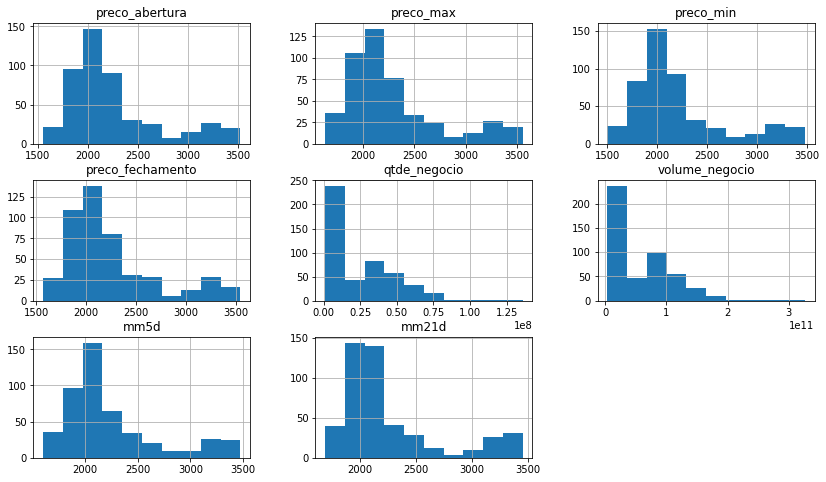

In [23]:
dados_ml.hist(figsize=(14,8))

In [24]:
dados_ml.columns

Index(['preco_abertura', 'preco_max', 'preco_min', 'preco_fechamento',
       'qtde_negocio', 'volume_negocio', 'mm5d', 'mm21d'],
      dtype='object')

In [25]:
# dados_ml['preco_abertura'] = dados_ml['preco_abertura'].apply(np.log1p)
# dados_ml['preco_max'] = dados_ml['preco_max'].apply(np.log1p)
# dados_ml['preco_min'] = dados_ml['preco_min'].apply(np.log1p)
# dados_ml['preco_fechamento_desejado'] = dados_ml['preco_fechamento_desejado'].apply(np.log1p)
dados_ml['qtde_negocio'] = dados_ml['qtde_negocio'].apply(np.log1p)
dados_ml['volume_negocio'] = dados_ml['volume_negocio'].apply(np.log1p)
# dados_ml['mm5d'] = dados_ml['mm5d'].apply(np.log1p)
# dados_ml['mm21d'] = dados_ml['mm21d'].apply(np.log1p)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7823103990>,
      dtype=object)

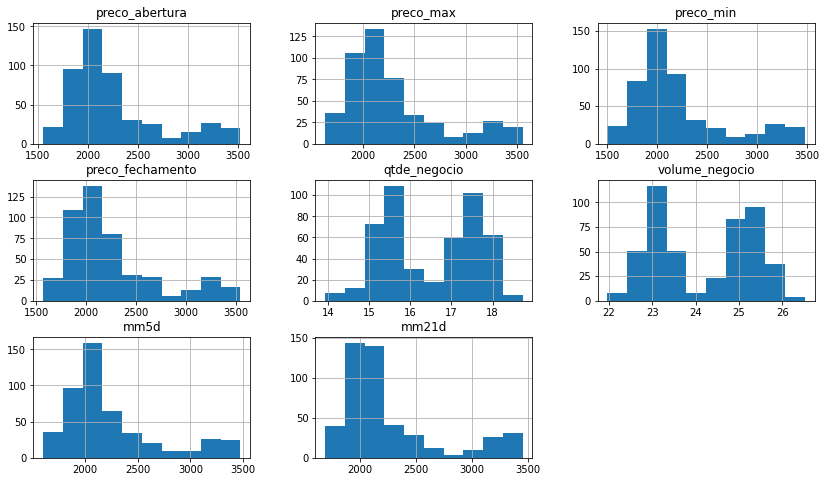

In [26]:
dados_ml.hist(figsize=(14,8))

In [27]:
dados_ml.head()

,preco_abertura,preco_max,preco_min,preco_fechamento,qtde_negocio,volume_negocio,mm5d,mm21d
data_do_pregao,,,,,,,,
2020-01-20,3360.0,3360.0,3298.0,3191.0,13.936046,22.040815,3300.2,3450.285714
2020-01-21,3300.0,3300.0,3191.0,3218.0,14.871737,22.954668,3276.0,3433.476190
2020-01-22,3228.0,3248.0,3181.0,3305.0,14.263141,22.335858,3272.4,3408.095238
2020-01-23,3195.0,3320.0,3174.0,3476.0,14.942970,23.036379,3275.6,3399.428571
2020-01-14,3483.0,3485.0,3434.0,3415.0,16.470954,24.618991,3299.2,3386.333333


In [28]:
dados_ml.describe().T

,count,mean,std,min,25%,50%,75%,max
preco_abertura,477.0,2247.683438,455.693343,1552.000000,1950.000000,2106.000000,2380.000000,3526.000000
preco_max,477.0,2287.213836,455.344929,1629.000000,1983.000000,2141.000000,2430.000000,3556.000000
preco_min,477.0,2203.345912,454.368844,1502.000000,1910.000000,2070.000000,2319.000000,3478.000000
preco_fechamento,477.0,2239.748428,451.611219,1568.000000,1943.000000,2091.000000,2374.000000,3545.000000
qtde_negocio,477.0,16.490421,1.101395,13.936046,15.494064,16.472506,17.505457,18.726759
volume_negocio,477.0,24.188256,1.125763,21.970048,23.081429,24.455708,25.204357,26.510086
mm5d,477.0,2243.262055,446.513099,1601.000000,1958.400000,2087.400000,2388.200000,3475.200000
mm21d,477.0,2257.461416,455.264223,1689.380952,1992.571429,2075.238095,2369.333333,3450.285714


## Separando as amostras de treino e teste.

In [29]:
X = dados_ml.drop(columns=['preco_fechamento'],axis=1)
Y = dados_ml['preco_fechamento']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y,test_size=0.20, random_state = 123, shuffle = False)

In [32]:
X_treino.tail()

,preco_abertura,preco_max,preco_min,qtde_negocio,volume_negocio,mm5d,mm21d
data_do_pregao,,,,,,,
2020-10-14,2093.0,2107.0,2082.0,17.171739,24.818382,2055.4,1959.380952
2020-10-15,2057.0,2106.0,2048.0,17.343053,24.983714,2077.4,1963.952381
2020-10-16,2065.0,2067.0,2033.0,16.974297,24.599062,2071.0,1966.857143
2020-10-19,2049.0,2107.0,2031.0,17.764020,25.400924,2068.4,1973.333333
2020-10-20,1901.0,1974.0,1901.0,15.726622,23.306954,2043.0,1974.190476


In [33]:
X_teste.head()

,preco_abertura,preco_max,preco_min,qtde_negocio,volume_negocio,mm5d,mm21d
data_do_pregao,,,,,,,
2020-10-21,1963.0,2005.0,1941.0,15.630596,23.225282,2020.8,1975.476190
2020-10-22,1980.0,2065.0,1973.0,15.915759,23.532713,2014.8,1979.285714
2020-10-23,2045.0,2101.0,2030.0,15.596007,23.226236,2016.2,1981.571429
2020-10-26,2038.0,2069.0,2017.0,15.343088,22.969098,2016.6,1985.285714
2020-10-27,2085.0,2108.0,1996.0,15.802755,23.420080,2026.8,1994.476190


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_treino, Y_treino)
y_pred= lr.predict(X_teste)
lr.score(X_treino,Y_treino)

0.9489953661718439

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)

print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 83.9698
MSE = 12198.9298
RMSE = 110.4488
R2 = 0.7831


In [39]:
df = Y_teste.reset_index()

In [40]:
df['previsao'] = y_pred

In [41]:
df = df.set_index('data_do_pregao')

In [50]:
df['preco_fechamento'] = df['preco_fechamento'].shift(+1)

In [51]:
df.head(10)

,preco_fechamento,previsao
data_do_pregao,,
2020-10-21,NaN,1961.010157
2020-10-22,2044.0,2012.579340
2020-10-23,2040.0,2052.407623
2020-10-26,2063.0,2023.548860
2020-10-27,2010.0,1996.055177
2020-10-28,1889.0,1903.401992
2020-10-20,2150.0,2107.619738
2020-10-21,2172.0,2120.599725
2020-10-22,2272.0,2195.301690


Text(0.5, 1.0, ' Valor real x Valor')

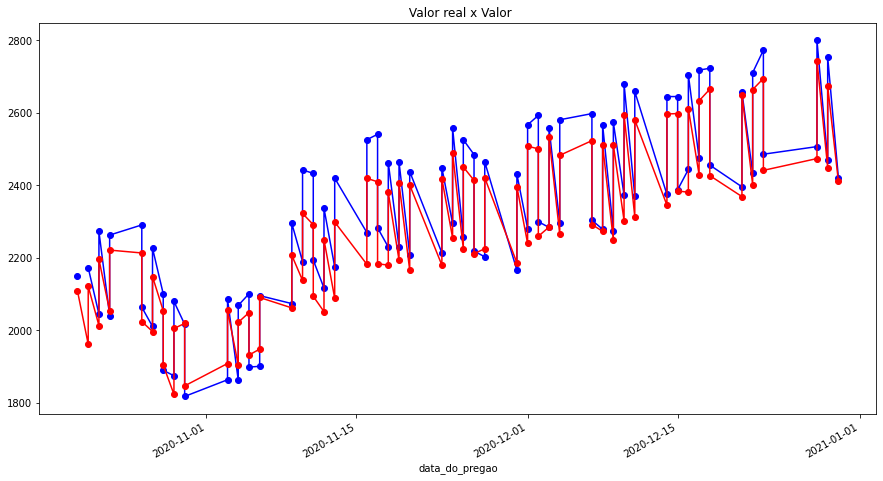

In [52]:
plt.figure(figsize=(15,8))

df['preco_fechamento'].plot( label="real", color='blue', marker='o')
df['previsao'].plot(label="previsão", color='red',marker='o')
plt.title(' Valor real x Valor')


## Treinado com outros modelos.

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
           
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 1.0
Test score -0.10637319175086768
Treinando RandomForestRegressor
Train score 0.9895761430303517
Test score 0.4453686283983981
Treinando MLPRegressor
Train score 0.9088962297473943
Test score 0.7740814941101847
Treinando XGBRegressor
[22:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.9810900894907127
Test score 0.25937876897814616


In [45]:
# repetindo processo com validação cruzada
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [LinearRegression(),
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Validation score', val_score.mean())
  print('Test score', test_score)
  print('='*80)

Treinando LinearRegression
Train score 0.9489953661718439
Validation score 0.6333097731374238
Test score 0.7831213800721956
Treinando DecisionTreeRegressor
Train score 1.0
Validation score -0.6980476791251501
Test score -0.07757906613621213
Treinando RandomForestRegressor
Train score 0.9898118536495344
Validation score -0.4222060802450886
Test score 0.4456553466051603
Treinando MLPRegressor
Train score 0.9352481740589146
Validation score 0.3297009676048609
Test score 0.7768437409895921
Treinando XGBRegressor
[22:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor

In [46]:
from sklearn.model_selection import GridSearchCV
rn = MLPRegressor()

parameter_space = {
        'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam', 'lbfgs'], 
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive'],
    }

search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)


search.fit(X_treino,Y_treino)
clf = search.best_estimator_
pred= search.predict(X_teste)

In [47]:
MAE  = mean_absolute_error(Y_teste,pred)
MSE  = mean_squared_error(Y_teste,pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,pred))
R2 = r2_score(Y_teste, pred)

print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 78.3886
MSE = 11356.6372
RMSE = 106.5675
R2 = 0.7981


In [48]:
df_rn = Y_teste.reset_index()
df_rn['previsao'] = pred

df_rn = df_rn.set_index('data_do_pregao')

df_rn.head()

,preco_fechamento,previsao
data_do_pregao,,
2020-10-21,2044.0,1957.083737
2020-10-22,2040.0,2021.916770
2020-10-23,2063.0,2054.799874
2020-10-26,2010.0,2038.589691
2020-10-27,1889.0,2017.514298


In [53]:
df_rn['preco_fechamento'] = df_rn['preco_fechamento'].shift(+1)
df_rn.head()

,preco_fechamento,previsao
data_do_pregao,,
2020-10-21,NaN,1957.083737
2020-10-22,2044.0,2021.916770
2020-10-23,2040.0,2054.799874
2020-10-26,2063.0,2038.589691
2020-10-27,2010.0,2017.514298


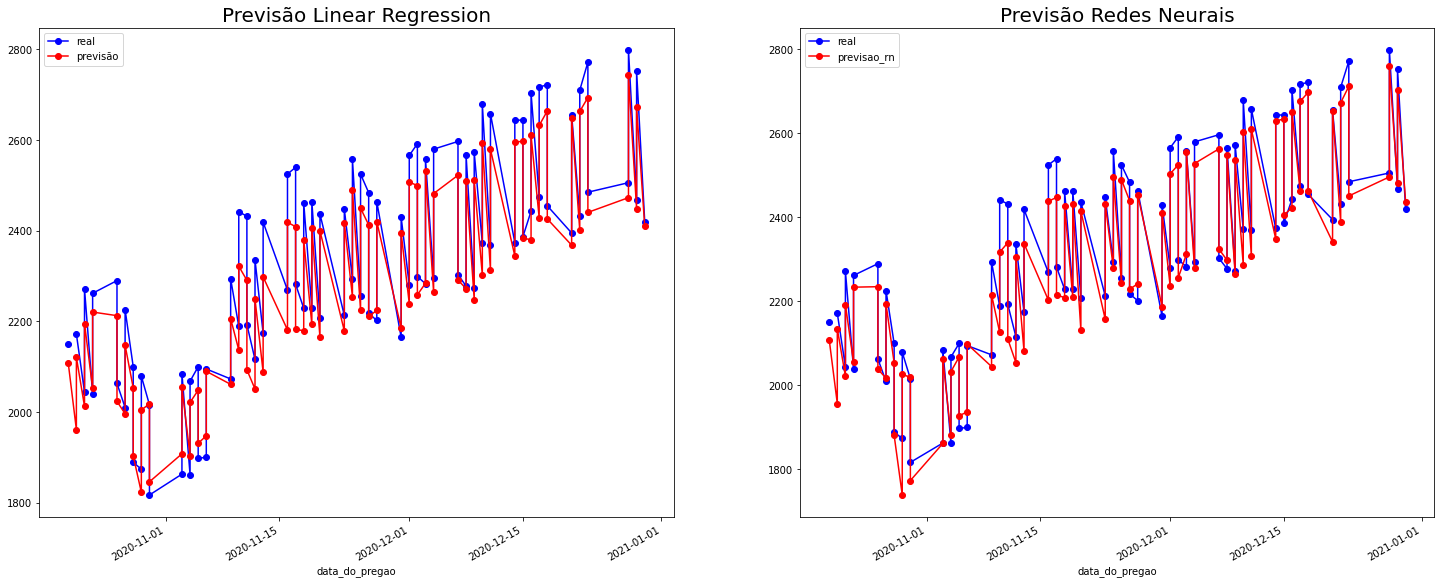

In [58]:
fig, axes = plt.subplots(1,2,figsize=(25,10))


axes[0].set_title('Previsão Linear Regression', fontsize=20)
axes[1].set_title('Previsão Redes Neurais',fontsize=20)
df['preco_fechamento'].plot(ax=axes[0], label="real", color='blue', marker='o')
df['previsao'].plot(ax=axes[0], label="previsão", color='red',marker='o')
axes[0].legend()


df['preco_fechamento'].plot(ax=axes[1], label="real", color='blue', marker='o')
df_rn['previsao'].plot(ax=axes[1], label='previsao_rn', color='red', marker='o')

axes[1].legend()
plt.show()